In [19]:
import time
from decimal import Decimal
from multiprocessing import Pool, cpu_count

import matplotlib.pyplot as plt

In [20]:
def run_factorial(method_factorial, num):
    init_time = time.time()
    result = method_factorial(num)
    final_time = time.time()

    return init_time, result, final_time


get_time = lambda init_time, final_time: final_time - init_time


def print_run_factorial(method_factorial, num):
    init_time, result, final_time = run_factorial(method_factorial, num)

    if result > 9999999999:
        sci_result = Decimal(result).normalize()
        print(f"Fatorial de {num} é {sci_result:.3E}")
    else:
        print(f"Fatorial de {num} é {result}")
    print(f"Tempo de processamento: {get_time(init_time, final_time):.4f} segundos")


num_test = 100000

In [21]:
def serial_factorial(num):
    pre_result = 1
    for i in range(2, num + 1):
        pre_result *= i
    return pre_result


print_run_factorial(serial_factorial, num_test)

Fatorial de 100000 é 2.824E+456573
Tempo de processamento: -1.733959674835205 segundos


In [22]:
def partial_product(range_of_values):
    inital_value, final_value = range_of_values
    result_parcial = 1
    for i in range(inital_value, final_value + 1):
        result_parcial *= i
    return result_parcial


def split_blocks(num, num_blocks):
    size = num // num_blocks
    blocks = []
    inital_value = 1
    for i in range(num_blocks):
        final_value = inital_value + size - 1 if i < num_blocks - 1 else num
        blocks.append((inital_value, final_value))
        inital_value = final_value + 1
    return blocks


def parallel_factorial(num: int) -> int:
    num_procs = cpu_count()
    blocks = split_blocks(num, num_procs)

    with Pool(num_procs) as pool:
        results = pool.map(partial_product, blocks)

    result_final = 1
    for r in results:
        result_final *= r
    return result_final


print_run_factorial(parallel_factorial, num_test)

Fatorial de 100000 é 2.824E+456573
Tempo de processamento: -0.25653529167175293 segundos


In [39]:
def get_data_for_execution_method(method_factorial, range_values, max_exec_time):
    result_tests = []
    exec_time = 0

    for num_test in range_values:
        if exec_time <= max_exec_time:
            init_time, result, final_time = run_factorial(method_factorial, num_test)
            exec_time = get_time(init_time, final_time)
            result_tests.append((init_time, result, final_time))
    return result_tests

In [70]:
initial_value_test = 100
final_value_test = 100000

result_tests = []
max_exec_time = 3

x = range(initial_value_test, final_value_test + 1, initial_value_test)[1:]
serial_execution = [get_time(init_time, final_time) for init_time, result, final_time in
                    get_data_for_execution_method(serial_factorial, x, max_exec_time)]
parallel_execution = [get_time(init_time, final_time) for init_time, result, final_time in
                      get_data_for_execution_method(parallel_factorial, x, max_exec_time)]

max_executions = max(len(serial_execution), len(parallel_execution))
resizing_vectors = lambda vector: (vector + [0] * (max_executions - len(vector))) \
    if len(vector) < max_executions \
    else vector[:max_executions]

x, serial_execution, parallel_execution = [resizing_vectors(list(v)) for v in [x, serial_execution, parallel_execution]]

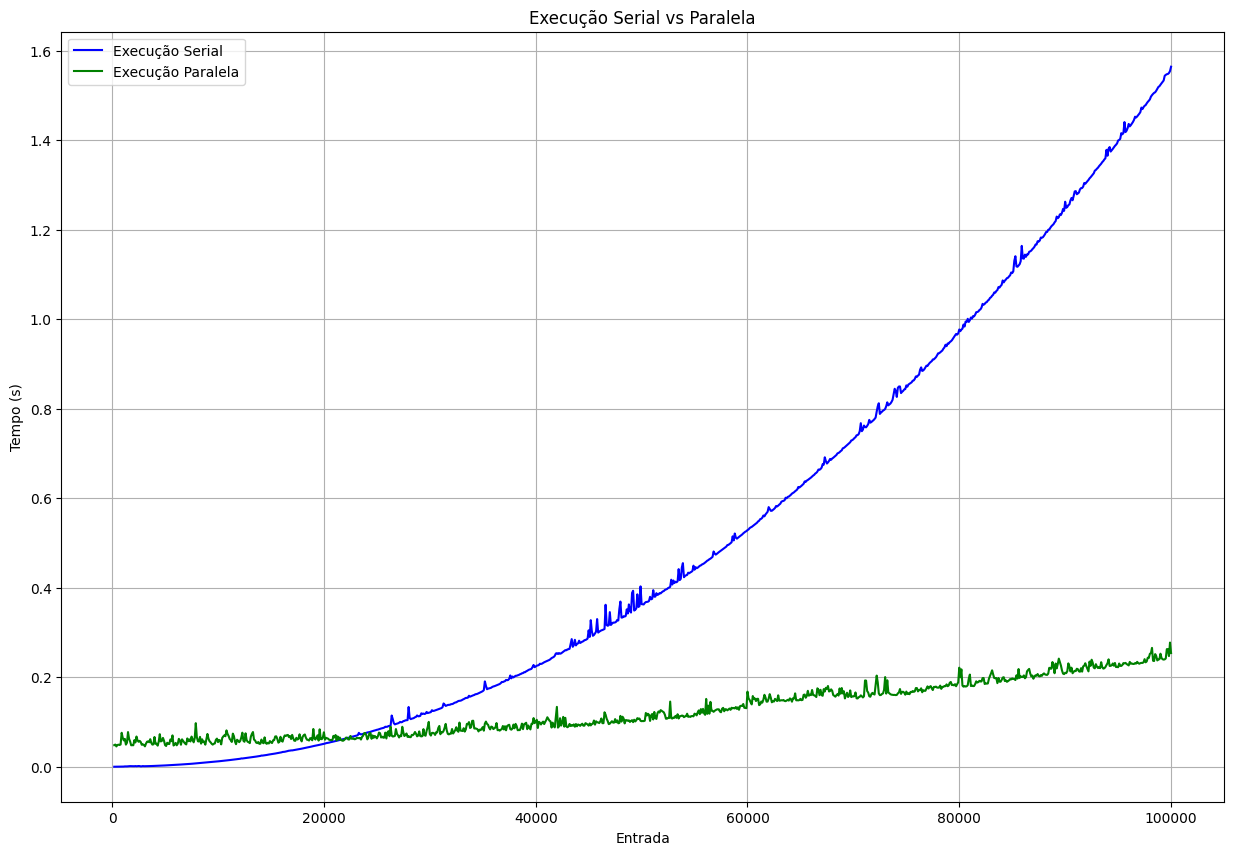

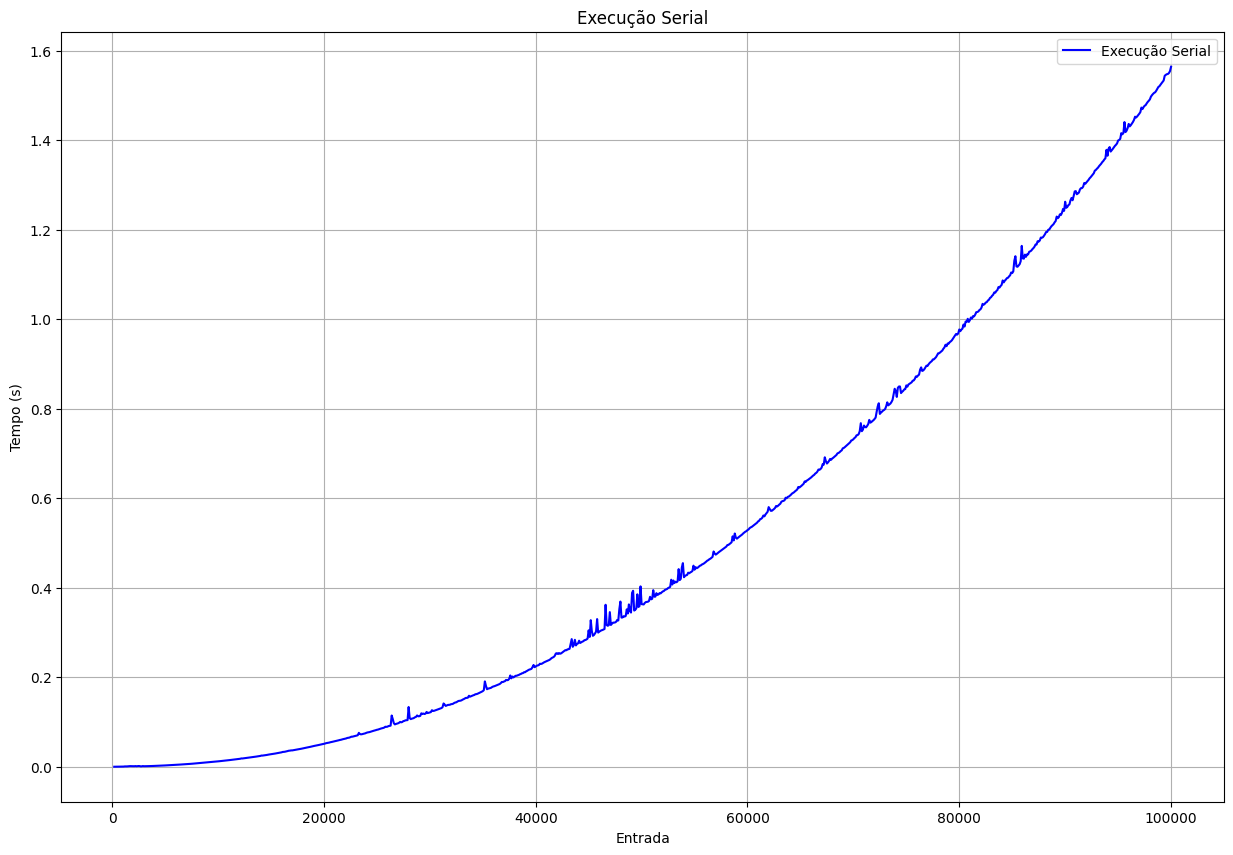

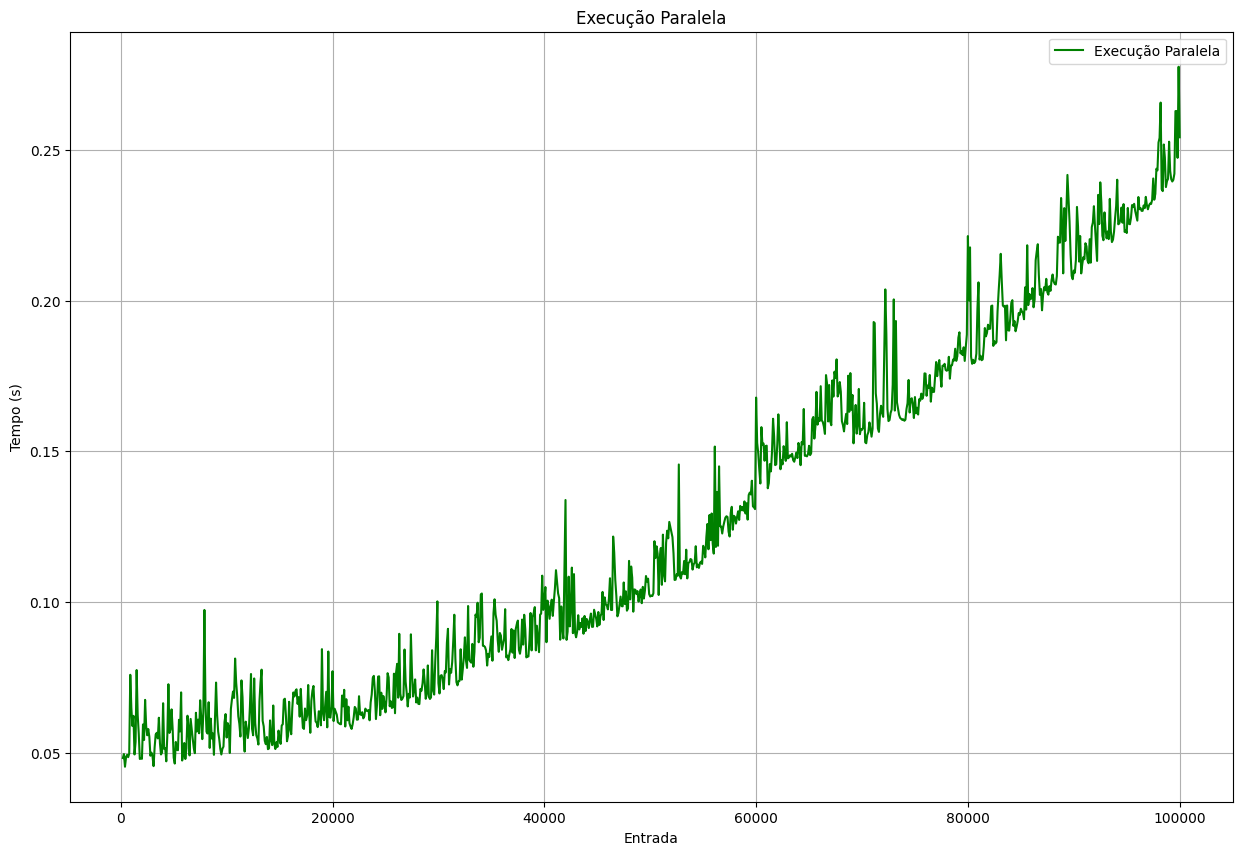

In [79]:
def filtrar_zeros(x, y):
    return zip(*[(xi, yi) for xi, yi in zip(x, y) if yi != 0])


x1, y1 = filtrar_zeros(x, serial_execution)
x2, y2 = filtrar_zeros(x, parallel_execution)

infos = [
    {
        'title': 'Execução Serial vs Paralela',
        'series': [
            {'x': x1, 'y': y1, 'color': 'blue', 'label': 'Execução Serial'},
            {'x': x2, 'y': y2, 'color': 'green', 'label': 'Execução Paralela'}
        ]
    },
    {
        'title': 'Execução Serial',
        'series': [{'x': x1, 'y': y1, 'color': 'blue', 'label': 'Execução Serial'}]
    },
    {
        'title': 'Execução Paralela',
        'series': [{'x': x2, 'y': y2, 'color': 'green', 'label': 'Execução Paralela'}]
    }
]

for info in infos:
    plt.figure(figsize=(15, 10))
    for s in info['series']:
        plt.plot(s['x'], s['y'], color=s['color'], label=s['label'])
    plt.title(info['title'])
    plt.xlabel('Entrada')
    plt.ylabel('Tempo (s)')
    plt.legend()
    plt.grid(True)
    plt.show()
